In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

       no_of_outages_2020_2024
count                18.000000
mean                 96.388889
std                  96.538404
min                   2.000000
25%                   8.250000
50%                  64.500000
75%                 190.250000
max                 284.000000


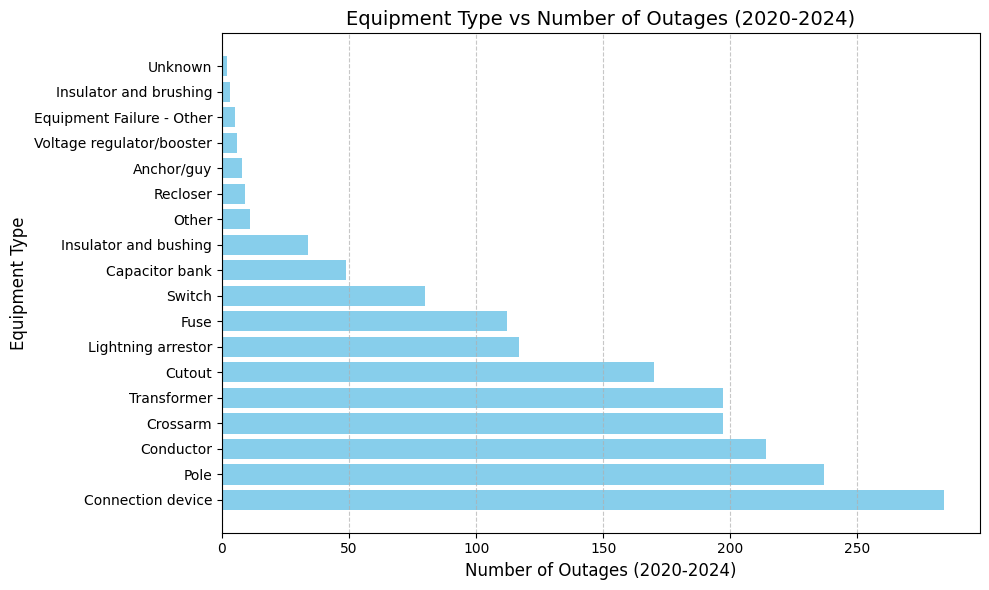

In [2]:
"""Outages

Graph that displays the equipment type and number of outages (2020-2024)
"""

file_path = "data/outage_frequency_2020-2024.xlsx"
outage_data = pd.read_excel(file_path)
outage_data = outage_data.sort_values(by='no_of_outages_2020_2024', ascending=False)

print(outage_data.describe())

# Plot
plt.figure(figsize=(10, 6))
plt.barh(outage_data['equipment_type'], outage_data['no_of_outages_2020_2024'], color='skyblue')
plt.xlabel('Number of Outages (2020-2024)', fontsize=12)
plt.ylabel('Equipment Type', fontsize=12)
plt.title('Equipment Type vs Number of Outages (2020-2024)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **Outages Analysis**

From this bar graph of the outages data, we are able to see that **connection devices, poles, conductors, and crossarms** are all infrastructure that have high outage numbers.

       no_of_infraction_2020-2024
count                   38.000000
mean                   481.157895
std                   1205.054614
min                      1.000000
25%                     12.000000
50%                     52.500000
75%                    283.000000
max                   6289.000000


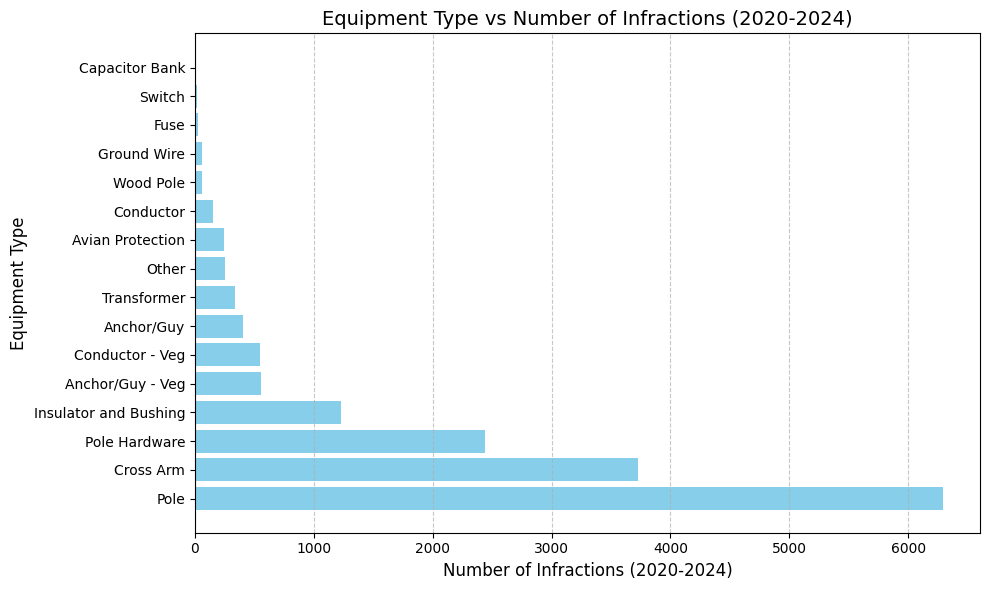

In [3]:
"""Infractions

Graph that displays the equipment type and number of infractions (2020-2024)
"""

file_path = "data/infraction_frequency_2020-2024.csv"
infraction_data = pd.read_csv(file_path)
infraction_data = infraction_data.sort_values(by='no_of_infraction_2020-2024', ascending=False)

print(infraction_data.describe())

# Plot
plt.figure(figsize=(10, 6))
plt.barh(infraction_data['equipment_type'], infraction_data['no_of_infraction_2020-2024'], color='skyblue')
plt.xlabel('Number of Infractions (2020-2024)', fontsize=12)
plt.ylabel('Equipment Type', fontsize=12)
plt.title('Equipment Type vs Number of Infractions (2020-2024)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Infractions Analysis**

From this bar graph of the infractions data, we are able to see that **poles, cross arms, pole hardware, and Insulator and Bushing** are all infrastructure that have high infraction numbers.


# **Overall Analysis**
From the outages and infractions graphs, we can see that poles and cross arms are both major points of both outages and infractions.

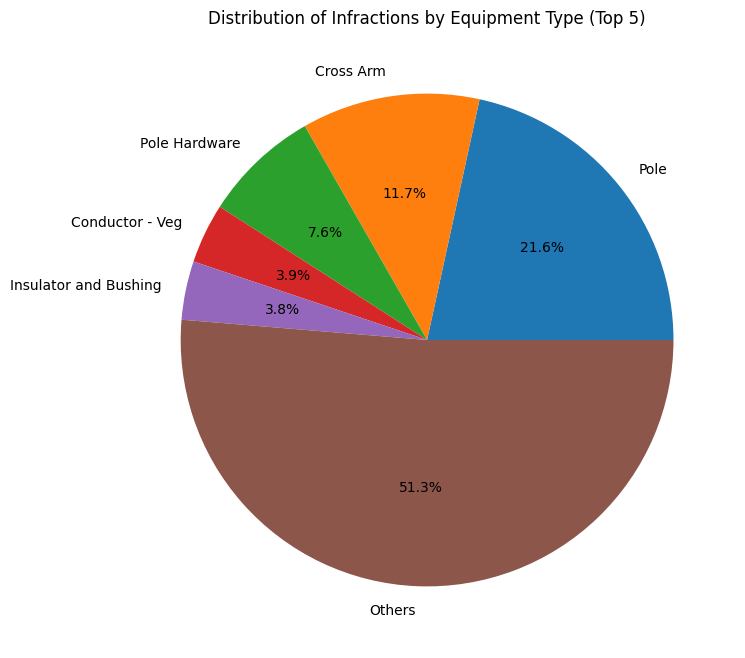

In [4]:
# Group by equipment type and sum infractions
equipment_totals = infraction_data.groupby('equipment_type')['no_of_infraction_2020-2024'].sum()
top_5_equipment = equipment_totals.nlargest(5)
others = pd.Series({'Others': equipment_totals[5:].sum()})
plot_data = pd.concat([top_5_equipment, others])

plt.figure(figsize=(10, 8))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%')
plt.title('Distribution of Infractions by Equipment Type (Top 5)')
plt.show()


## **Top 5 Equipment Types Infraction Distribution Analysis**

The pie chart reveals the distribution of infractions across equipment types, with a clear concentration among the top 5 offenders:

1. **Pole (21.6%)**:
   - Represents over one-fifth of all infractions
   - Primary contributor to infrastructure issues

2. **Cross Arm (11.7%)**:
   - Second highest contributor
   - Accounts for approximately one-tenth of all infractions
   - Suggests a significant vulnerability in horizontal support structures

3. **Pole Hardware (7.6%)**:
   - Third most common issue
   - Indicates frequent problems with auxiliary equipment and attachments
   - May represent an opportunity for preventive maintenance

4. **Conductor - Veg (3.9%)**:
   - Critical components for electrical isolation
   - Despite lower percentage, failures could lead to significant safety risks

5. **Insulator and Bushing (3.8%)**:
   - Related to vegetation interference with support structures
   - While a smaller percentage, represents an ongoing maintenance challenge

The remaining **51.3%** of infractions are distributed among other equipment types, suggesting that focusing maintenance efforts on these top 5 categories could address over half of all infractions.

### Key Takeaways:
- The top 3 categories alone account for over 40% of all infractions
- Pole-related issues (including hardware) represent nearly 30% of all infractions
- Vegetation management appears as a significant factor in infrastructure maintenance
